In [77]:
import numpy as np

path = '/users/PCON0003/warner785/CosmoCov/covs/zdistris/'
nz = np.loadtxt(path+'lens_test.nz')
nz_array = np.array(nz)

In [78]:
print(nz_array)

[[5.83433167e-03 0.00000000e+00 0.00000000e+00]
 [1.75009950e-02 0.00000000e+00 0.00000000e+00]
 [2.91676583e-02 0.00000000e+00 0.00000000e+00]
 [4.08343217e-02 0.00000000e+00 0.00000000e+00]
 [5.25009850e-02 1.71428620e-04 0.00000000e+00]
 [6.41676483e-02 8.57143102e-05 0.00000000e+00]
 [7.58343117e-02 7.71428792e-04 0.00000000e+00]
 [8.75009750e-02 4.28571551e-03 0.00000000e+00]
 [9.91676383e-02 9.34285981e-03 0.00000000e+00]
 [1.10834302e-01 2.44285784e-02 0.00000000e+00]
 [1.22500965e-01 6.11143032e-02 0.00000000e+00]
 [1.34167628e-01 1.26257179e-01 0.00000000e+00]
 [1.45834292e-01 2.41885783e-01 0.00000000e+00]
 [1.57500955e-01 4.39114411e-01 0.00000000e+00]
 [1.69167618e-01 6.92485912e-01 0.00000000e+00]
 [1.80834282e-01 1.06457173e+00 0.00000000e+00]
 [1.92500945e-01 1.49622900e+00 0.00000000e+00]
 [2.04167608e-01 1.95642913e+00 0.00000000e+00]
 [2.15834272e-01 2.47405785e+00 0.00000000e+00]
 [2.27500935e-01 2.86954368e+00 0.00000000e+00]
 [2.39167598e-01 3.26974379e+00 0.000000

In [82]:
x = []
y = [] 
z = []
for i in range(300):
    x.append(nz_array[i][0])
    y.append(nz_array[i][1])
    z.append(nz_array[i][2])

In [83]:
x_ar = np.array(x)

In [84]:
print(x_ar.size)

300


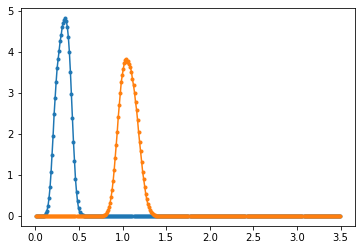

In [85]:
import matplotlib.pyplot as plt

plt.plot(x,y, marker='.')
plt.plot(x,z,marker='.')

In [88]:
area = np.trapz(z,x)
print(area)

0.9999999999999993


In [89]:
# create real CMASS nz file to replace example:
import sys
sys.path.append('../')
from xd import *
from utils import *
import esutil
import healpy as hp
from systematics import *
from systematics_module import *
import os

path = '/fs/scratch/PCON0008/warner785/bwarner/'
cmass = fitsio.read(path+'galaxy_DR12v5_CMASS_South.fits.gz') 

In [90]:
print(cmass.dtype.names)

('RA', 'DEC', 'RUN', 'RERUN', 'CAMCOL', 'FIELD', 'ID', 'ICHUNK', 'IPOLY', 'ISECT', 'FRACPSF', 'EXPFLUX', 'DEVFLUX', 'PSFFLUX', 'MODELFLUX', 'FIBER2FLUX', 'R_DEV', 'EXTINCTION', 'PSF_FWHM', 'AIRMASS', 'SKYFLUX', 'EB_MINUS_V', 'IMAGE_DEPTH', 'IMATCH', 'Z', 'WEIGHT_FKP', 'WEIGHT_CP', 'WEIGHT_NOZ', 'WEIGHT_STAR', 'WEIGHT_SEEING', 'WEIGHT_SYSTOT', 'NZ', 'COMP', 'PLATE', 'FIBERID', 'MJD', 'FINALN', 'TILE', 'SPECTILE', 'ICOLLIDED', 'INGROUP', 'MULTGROUP')


In [91]:
y,x = np.histogram(cmass['Z'], bins=300, range =(0,1))
bin_widths = np.diff(x)
x_c = x[:-1] + bin_widths/2
#x = x[:-1]

In [92]:
area = np.trapz(y,x_c)
print(area)
y_norm = y/area
#avg = np.average(y)
#y_norm = y/avg

769.2150044213049


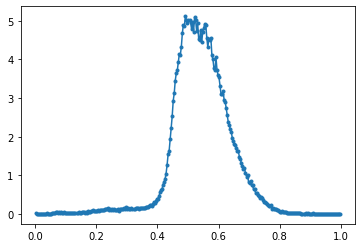

In [93]:
plt.plot(x_c,y_norm, marker='.')

In [94]:
#check normalization:
area = np.trapz(y_norm,x_c)
print(area)

1.0


In [95]:
# Creates a list containing 300 lists, each of 2 items, all set to 0
w, h = 2, 300
Matrix = [[0 for x in range(w)] for y in range(h)] 
for i in range(h):
    Matrix[i][0]= x_c[i]
    Matrix[i][1]= y_norm[i]

In [96]:
cmass_nz = np.array(Matrix)

In [97]:
print(cmass_nz.shape)
print(x_c[0])

(300, 2)
0.0016666667


In [98]:
print(cmass_nz)

[[1.66666671e-03 1.95003996e-02]
 [4.99999989e-03 1.30002664e-03]
 [8.33333284e-03 0.00000000e+00]
 [1.16666667e-02 0.00000000e+00]
 [1.50000006e-02 3.90007993e-03]
 [1.83333345e-02 1.04002131e-02]
 [2.16666665e-02 9.10018650e-03]
 [2.50000004e-02 2.60005329e-03]
 [2.83333324e-02 9.10018650e-03]
 [3.16666663e-02 2.60005329e-03]
 [3.50000001e-02 6.50013322e-03]
 [3.83333340e-02 1.17002398e-02]
 [4.16666642e-02 9.10018650e-03]
 [4.50000018e-02 6.50013322e-03]
 [4.83333319e-02 6.50013322e-03]
 [5.16666695e-02 1.04002131e-02]
 [5.49999997e-02 1.30002664e-02]
 [5.83333336e-02 2.86005861e-02]
 [6.16666675e-02 2.99006128e-02]
 [6.49999976e-02 2.86005861e-02]
 [6.83333352e-02 4.42009059e-02]
 [7.16666654e-02 3.77007726e-02]
 [7.50000030e-02 3.12006394e-02]
 [7.83333331e-02 4.16008526e-02]
 [8.16666633e-02 3.64007460e-02]
 [8.50000009e-02 5.98012256e-02]
 [8.83333385e-02 2.73005595e-02]
 [9.16666687e-02 2.86005861e-02]
 [9.49999988e-02 4.03008259e-02]
 [9.83333290e-02 2.60005329e-02]
 [1.016666

In [99]:
path = '/users/PCON0003/warner785/CosmoCov/covs/zdistris/'
np.savetxt(path+'cmass_v3.nz', cmass_nz)

In [106]:
def keepGoodRegion(des, hpInd = False, balrog=None):
    import healpy as hp
    import fitsio
    # 25 is the faintest object detected by DES
    # objects larger than 25 considered as Noise
    
    path = '/fs/scratch/PCON0008/warner785/bwarner/'
    #LSSGoldmask = fitsio.read(path+'Y1LSSmask_v2_il22_seeil4.0_nside4096ring_redlimcut.fits')
    #LSSGoldmask = fitsio.read(path+'Y1LSSmask_v1_il22seeil4.04096ring_redlimcut.fits')
    LSSGoldmask = fitsio.read(path+'MASK_Y3LSSBAOSOF_22_3_v2p2.fits')
    ringhp = hp.nest2ring(4096, [LSSGoldmask['PIXEL']])
    #Y1LSSmask_v1_il22seeil4.04096ring_redlimcut.fits
    #frac_cut = LSSGoldmask['FRAC'] > 0.8
    #ind_good_ring = LSSGoldmask['PIXEL'][frac_cut]
    ind_good_ring = ringhp
    
    # healpixify the catalog.
    nside=4096
    # Convert silly ra/dec to silly HP angular coordinates.
    phi = des['RA'] * np.pi / 180.0
    theta = ( 90.0 - des['DEC'] ) * np.pi/180.0

    hpInd = hp.ang2pix(nside,theta,phi,nest=False)
    keep = np.in1d(hpInd, ind_good_ring)
    des = des[keep]
    if hpInd is True:
        return ind_good_ring
    else:
        return des

In [107]:
import esutil
import fitsio
import numpy as np
cmass = esutil.io.read('/fs/scratch/PCON0003/warner785/bwarner/cmass-dr12v4-S-Reid-full.dat.fits')
train_sample = esutil.io.read('/fs/scratch/PCON0003/warner785/bwarner/cmass-dr12v4-S-Reid-full.dat.fits')
#train_sample = esutil.io.read('/global/cscratch1/sd/bwarner/galaxy_DR11v1_CMASS_South-photoObj.fits.gz')
print('total num of train', train_sample.size)
print('\n--------------------------------\n applying DES veto mask to CMASS\n--------------------------------')   
train_sample = keepGoodRegion(train_sample)

#fitsio.write( output_dir+'/cmass_in_st82.fits', train_sample)

print('num of train_sample after des veto', train_sample.size)

total num of train 258884

--------------------------------
 applying DES veto mask to CMASS
--------------------------------
num of train_sample after des veto 61031


In [32]:
# call required functions from modules 

sys.path.append('code_py3/')
from cmass_modules import io
from utils import matchCatalogsbyPosition, hpHEALPixelToRaDec, HealPixifyCatalogs, spatialcheck
from xd import mixing_color, XD_fitting_X, assignCMASSProb, doVisualization_1d
from run_DMASS_Y3 import priorCut_test

# Calling Y3 GOLD v2.0 (training)
# All catalogs are in the 'input_path' directory 
# The 'SearchAndCallFits' function below loads all 
# catalogs in the directory including 'input_keyword' in its name
#input_path = '/n/des/lee.5922/data/gold_cat_Y3/STRIPE82/feae9705305d4430993687930f1cc3ad/'
input_path = '/fs/scratch/PCON0008/warner785/bwarner/gold_full/'
# call only first 9 catalogs for a fast run.
# to call all catalogs in the directory, use 'Y3_GOLD' as input_keyword 
# but that will consume huge memory
input_keyword = 'gold_st82_final'  
# Columns to call
columns =  ['RA', 'DEC', 
            'HPIX_4096',     # Healpix in ring order, nside=4096
            'SOF_CM_MAG_CORRECTED_G', # mag_[griz]
            'SOF_CM_MAG_CORRECTED_R',
            'SOF_CM_MAG_CORRECTED_I',
            'SOF_CM_MAG_CORRECTED_Z',
            'SOF_CM_MAG_ERR_G',       # mag error_[griz]
            'SOF_CM_MAG_ERR_R',
            'SOF_CM_MAG_ERR_I',
            'SOF_CM_MAG_ERR_Z',
            'COADD_OBJECT_ID', 'MAG_DETMODEL_G', 'MAG_DETMODEL_R', 'MAG_DETMODEL_I', 'MAG_DETMODEL_Z', 
            'MAGERR_DETMODEL_G', 'MAGERR_DETMODEL_R', 'MAGERR_DETMODEL_I', 'MAGERR_DETMODEL_Z','EXTENDED_CLASS_MASH_SOF']
gold_st82 = io.SearchAndCallFits(path = input_path, keyword = input_keyword, columns=columns)

# Color/Magnitude cuts to exclude extremely high or low mag/color sources.
# 16 < mag_riz < 24, 0 < (r-i) < 1.5, 0 < (g-r) < 2.5
# These galaxies are less likeliy to be a CMASS, therefore unnecessary. 
# We apply these cuts to reduce the sample size to speed up the codes
mask_magcut = priorCut_test(gold_st82)
gold_st82 = gold_st82[mask_magcut]
gold_st82 = gold_st82[(gold_st82['EXTENDED_CLASS_MASH_SOF'] == 3)]

def keepGoodRegion(des, hpInd = False, balrog=None):
    import healpy as hp
    import fitsio
    # 25 is the faintest object detected by DES
    # objects larger than 25 considered as Noise
    
    path = '/fs/scratch/PCON0003/warner785/bwarner/'
    #LSSGoldmask = fitsio.read(path+'Y1LSSmask_v2_il22_seeil4.0_nside4096ring_redlimcut.fits')
    #LSSGoldmask = fitsio.read(path+'Y1LSSmask_v1_il22seeil4.04096ring_redlimcut.fits')
    LSSGoldmask = fitsio.read(path+'MASK_Y3LSSBAOSOF_22_3_v2p2.fits')
    ringhp = hp.nest2ring(4096, [LSSGoldmask['PIXEL']])
    #Y1LSSmask_v1_il22seeil4.04096ring_redlimcut.fits
    #frac_cut = LSSGoldmask['FRAC'] > 0.8
    #ind_good_ring = LSSGoldmask['PIXEL'][frac_cut]
    ind_good_ring = ringhp
    
    # healpixify the catalog.
    nside=4096
    # Convert silly ra/dec to silly HP angular coordinates.
    phi = des['RA'] * np.pi / 180.0
    theta = ( 90.0 - des['DEC'] ) * np.pi/180.0

    hpInd = hp.ang2pix(nside,theta,phi,nest=False)
    keep = np.in1d(hpInd, ind_good_ring)
    des = des[keep]
    if hpInd is True:
        return ind_good_ring
    else:
        return des

print(gold_st82.size)    
gold_st82 = keepGoodRegion(gold_st82)
print(gold_st82.size)


Calling catalogs >>>
gold_st82_final_000056.fits
gold_st82_final_000003.fits
gold_st82_final_000026.fits
gold_st82_final_000121.fits
gold_st82_final_000094.fits
gold_st82_final_000040.fits
gold_st82_final_000010.fits
gold_st82_final_000082.fits
gold_st82_final_000068.fits
gold_st82_final_000075.fits
gold_st82_final_000103.fits
gold_st82_final_000112.fits
gold_st82_final_000043.fits
gold_st82_final_000125.fits
gold_st82_final_000083.fits
gold_st82_final_000101.fits
gold_st82_final_000016.fits
gold_st82_final_000031.fits
gold_st82_final_000041.fits
gold_st82_final_000052.fits
gold_st82_final_000092.fits
gold_st82_final_000027.fits
gold_st82_final_000127.fits
gold_st82_final_000095.fits
gold_st82_final_000114.fits
gold_st82_final_000079.fits
gold_st82_final_000045.fits
gold_st82_final_000086.fits
gold_st82_final_000007.fits
gold_st82_final_000029.fits
gold_st82_final_000055.fits
gold_st82_final_000076.fits
gold_st82_final_000069.fits
gold_st82_final_000105.fits
gold_st82_final_000100.fit

In [1]:
# START HERE-----------------------------------------------------------------------------------------
# call required functions from modules 

#sys.path.append('code_py3/')
import numpy as np
from cmass_modules import io
from utils import matchCatalogsbyPosition, hpHEALPixelToRaDec, HealPixifyCatalogs, spatialcheck
from xd import mixing_color, XD_fitting_X, assignCMASSProb, doVisualization_1d
from run_DMASS_Y3 import priorCut_test

# Calling Y3 GOLD v2.0 (training)
# All catalogs are in the 'input_path' directory 
# The 'SearchAndCallFits' function below loads all 
# catalogs in the directory including 'input_keyword' in its name
#input_path = '/n/des/lee.5922/data/gold_cat_Y3/STRIPE82/feae9705305d4430993687930f1cc3ad/'
input_path = '/fs/scratch/PCON0008/warner785/bwarner/'
# call only first 9 catalogs for a fast run.
# to call all catalogs in the directory, use 'Y3_GOLD' as input_keyword 
# but that will consume huge memory
input_keyword = 'photoz_GOLD_'  
# Columns to call
columns =  ['RA', 'DEC', 
            'HPIX_4096',     # Healpix in ring order, nside=4096
            'SOF_CM_MAG_CORRECTED_G', # mag_[griz]
            'SOF_CM_MAG_CORRECTED_R',
            'SOF_CM_MAG_CORRECTED_I',
            'SOF_CM_MAG_CORRECTED_Z',
            'SOF_CM_MAG_ERR_G',       # mag error_[griz]
            'SOF_CM_MAG_ERR_R',
            'SOF_CM_MAG_ERR_I',
            'SOF_CM_MAG_ERR_Z',
            'COADD_OBJECT_ID', 'MAG_DETMODEL_G', 'MAG_DETMODEL_R', 'MAG_DETMODEL_I', 'MAG_DETMODEL_Z', 
            'MAGERR_DETMODEL_G', 'MAGERR_DETMODEL_R', 'MAGERR_DETMODEL_I', 'MAGERR_DETMODEL_Z','EXTENDED_CLASS_MASH_SOF', 'DNF_ZMC_MOF', 'DNF_ZMC_SOF', 'DNF_ZMEAN_MOF', 'DNF_ZMEAN_SOF'] 
gold_st82 = io.SearchAndCallFits(path = input_path, keyword = input_keyword, columns=columns)

# Color/Magnitude cuts to exclude extremely high or low mag/color sources.
# 16 < mag_riz < 24, 0 < (r-i) < 1.5, 0 < (g-r) < 2.5
# These galaxies are less likeliy to be a CMASS, therefore unnecessary. 
# We apply these cuts to reduce the sample size to speed up the codes
mask_magcut = priorCut_test(gold_st82)
gold_st82 = gold_st82[mask_magcut]
gold_st82 = gold_st82[(gold_st82['EXTENDED_CLASS_MASH_SOF'] == 3)]

def keepGoodRegion(des, hpInd = False, balrog=None):
    import healpy as hp
    import fitsio
    # 25 is the faintest object detected by DES
    # objects larger than 25 considered as Noise
    
    path = '/fs/scratch/PCON0003/warner785/bwarner/'
    #LSSGoldmask = fitsio.read(path+'Y1LSSmask_v2_il22_seeil4.0_nside4096ring_redlimcut.fits')
    #LSSGoldmask = fitsio.read(path+'Y1LSSmask_v1_il22seeil4.04096ring_redlimcut.fits')
    LSSGoldmask = fitsio.read(path+'MASK_Y3LSSBAOSOF_22_3_v2p2.fits')
    ringhp = hp.nest2ring(4096, [LSSGoldmask['PIXEL']])
    #Y1LSSmask_v1_il22seeil4.04096ring_redlimcut.fits
    #frac_cut = LSSGoldmask['FRAC'] > 0.8
    #ind_good_ring = LSSGoldmask['PIXEL'][frac_cut]
    ind_good_ring = ringhp
    
    # healpixify the catalog.
    nside=4096
    # Convert silly ra/dec to silly HP angular coordinates.
    phi = des['RA'] * np.pi / 180.0
    theta = ( 90.0 - des['DEC'] ) * np.pi/180.0

    hpInd = hp.ang2pix(nside,theta,phi,nest=False)
    keep = np.in1d(hpInd, ind_good_ring)
    des = des[keep]
    if hpInd is True:
        return ind_good_ring
    else:
        return des

print(gold_st82.size)    
gold_st82 = keepGoodRegion(gold_st82)
print(gold_st82.size)

In /users/PCON0003/warner785/.conda/envs/DES_env/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /users/PCON0003/warner785/.conda/envs/DES_env/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /users/PCON0003/warner785/.conda/envs/DES_env/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.



Calling catalogs >>>
photoz_GOLD_000002.fits
photoz_GOLD_000003.fits
photoz_GOLD_000011.fits
photoz_GOLD_000001.fits
photoz_GOLD_000005.fits
photoz_GOLD_000009.fits
photoz_GOLD_000008.fits
photoz_GOLD_000010.fits
photoz_GOLD_000004.fits
photoz_GOLD_000007.fits
photoz_GOLD_000006.fits
reading 1/11 /fs/scratch/PCON0008/warner785/bwarner/photoz_GOLD_000002.fits
reading 2/11 /fs/scratch/PCON0008/warner785/bwarner/photoz_GOLD_000003.fits
reading 3/11 /fs/scratch/PCON0008/warner785/bwarner/photoz_GOLD_000011.fits
reading 4/11 /fs/scratch/PCON0008/warner785/bwarner/photoz_GOLD_000001.fits
reading 5/11 /fs/scratch/PCON0008/warner785/bwarner/photoz_GOLD_000005.fits
reading 6/11 /fs/scratch/PCON0008/warner785/bwarner/photoz_GOLD_000009.fits
reading 7/11 /fs/scratch/PCON0008/warner785/bwarner/photoz_GOLD_000008.fits
reading 8/11 /fs/scratch/PCON0008/warner785/bwarner/photoz_GOLD_000010.fits
reading 9/11 /fs/scratch/PCON0008/warner785/bwarner/photoz_GOLD_000004.fits
reading 10/11 /fs/scratch/PCON

In [5]:
import sys
sys.path.append('../')
from xd import *
from utils import *
import esutil
import healpy as hp
from systematics import *
from systematics_module import *
import os
from numpy.lib.recfunctions import append_fields
import scipy.stats

import matplotlib.pyplot as plt
import numpy as np
from run_systematics import sys_iteration, weightmultiply, fitting_allSP, calling_sysMap
from sys_functions import *

dmass_spt = calling_catalog('/fs/scratch/PCON0008/warner785/bwarner/dmass_spt.fits') #prob cut
index_mask = np.argsort(dmass_spt)
dmass_chron = dmass_spt[index_mask]
sys_weight = fitsio.read('/fs/scratch/PCON0008/warner785/bwarner/june23_tests/'+'final27.fits')

prob_st82 = calling_catalog('../output/test/train_cat/y3/dmass_st82_part1.fits') #prob cut
#prob_st82 = fitsio.read('../output/test/train_cat/y3/dmass_st82_part1.fits') # without prob cut
dmass_st82 = fitsio.read('/fs/scratch/PCON0008/warner785/bwarner/matched_cmass.fits')

def train_mask(sample):
    mask = (sample['RA']>310) & (sample['RA']<360)|(sample['RA']<7)
    mask = mask & (sample['DEC']>-10) & (sample['DEC']<10)
    mask_train = sample[mask]
    return mask_train

dmass_st82 = train_mask(dmass_st82)
prob_st82 = train_mask(prob_st82)
gold_st82 = train_mask(gold_st82)

# number of cmass = 20026
# area = 203 sqdeg

Resulting catalog size
DMASS= 341117.6414259936
Resulting catalog size
DMASS= 20206.04487947579


In [2]:
prob_st82 = calling_catalog('../output/test/train_cat/y3/dmass_st82_part1.fits')

NameError: name 'calling_catalog' is not defined

In [6]:
mg1, mg2, _ = esutil.htm.HTM(10).match(dmass_st82['RA'], dmass_st82['DEC'], gold_st82['RA'], \
                                         gold_st82['DEC'],2./3600, maxmatch=1)
cmass_mask = np.zeros(gold_st82.size, dtype=bool)
cmass_mask[mg2] = 1
clean_cmass_data_des, nocmass = gold_st82[cmass_mask], gold_st82[~cmass_mask]

clean_cmass_data_sdss = dmass_st82[mg1]
print(clean_cmass_data_sdss.size)

20654


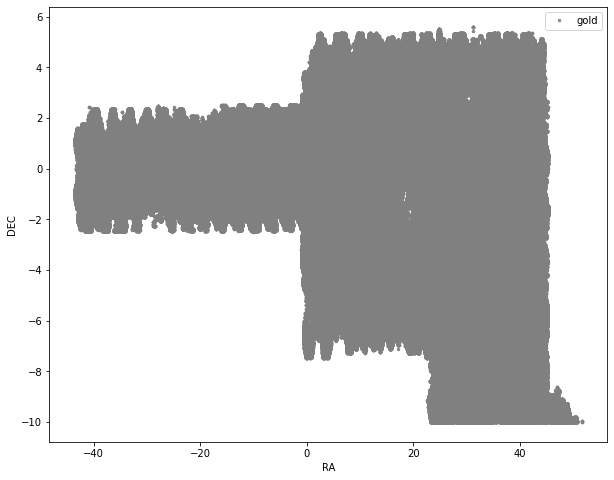

In [10]:
#check spt fits file:
spatialcheck([gold_st82], 
             label = ['gold'], convert = None, ratag='RA',dectag='DEC')

In [13]:
# In training region:

cmass_area = 203 # **end up using full CMASS numbers, for cross check
cmass_n = 20654 #61031  --- check with CMASS paper + y1
cmass_dens = cmass_n/cmass_area
cmass_error = (np.sqrt(cmass_n))/cmass_area
print(cmass_dens, cmass_error)

dmass_area = 203
dmass_n = np.sum(prob_st82['CMASS_PROB'])
dmass_dens = dmass_n/dmass_area
dmass_error = (np.sqrt(dmass_n))/dmass_area
print(dmass_dens, dmass_error)

101.74384236453201 0.7079556440300132
102.66126975816293 0.7111403101221345


In [3]:
from sys_functions import *
import numpy as np
import matplotlib.pyplot as plt

# with cut:
dmass_spt = calling_catalog('/fs/scratch/PCON0008/warner785/bwarner/dmass_spt.fits')
sys_weight = fitsio.read('/fs/scratch/PCON0008/warner785/bwarner/june23_tests/'+'final27.fits')

Resulting catalog size
DMASS= 341117.6414259936


In [4]:
#without cut:
#dmass_spt = fitsio.read('/fs/scratch/PCON0008/warner785/bwarner/dmass_spt.fits')

cmass_area = 2901.81 #2901.805 from mangle # **add: end up using full CMASS numbers, for cross check
cmass_n = 258884 #61031  --- check with CMASS paper + y1
cmass_dens = cmass_n/cmass_area
cmass_error = (np.sqrt(cmass_n))/cmass_area
print(cmass_dens, cmass_error)

dmass_area = 3525 # -- fixed area: include BAO mask for true area
# BAO mask sum fracdet, exclude > dec -10: convert to sqdeg
dmass_n = np.sum(dmass_spt['CMASS_PROB']*sys_weight)
dmass_dens = dmass_n/dmass_area
dmass_error = (np.sqrt(dmass_n))/dmass_area
print(dmass_dens, dmass_error)

# plot:
#fig, ax = plt.subplots()
#ax.errorbar(1, cmass_dens, yerr=cmass_error, label = "cmass")
#ax.errorbar(1, dmass_dens, yerr=dmass_error, label = "dmass")

89.21466257267016 0.17534106178558964
96.77415716058194 0.16569146509654276


In [3]:
import sys
sys.path.append('../')
from xd import *
from utils import *
import esutil
import healpy as hp
from systematics import *
from systematics_module import *
import os
from numpy.lib.recfunctions import append_fields
import scipy.stats

import healpy

import matplotlib.pyplot as plt
import numpy as np
from run_systematics import sys_iteration, weightmultiply, fitting_allSP, calling_sysMap
from sys_functions import *

In [4]:
import numpy as np

with open('fullCMASSnz.txt') as f:
    cmass = f.read()
    cmass = np.array(cmass)
    #print(cmass)

with open('y6dmass_small_clusteringz_nocorr_earlyNov23_cutrange_z_nz_err.txt') as g:
    dmass = g.read()
    dmass = np.array(dmass)
    #print(dmass)

In [5]:
z = []
w = 0

g = open('y6dmass_small_clusteringz_nocorr_earlyNov23_cutrange_z_nz_err.txt', 'r')
for line in g:
    line = line.strip()
    data = line.split(' ')
    data = np.array(data)
    #print(data[0])
    z.append(np.float(data[w]))
g.close()

In [6]:
print(z)

[0.22999999999999998, 0.25, 0.27, 0.29000000000000004, 0.31, 0.32999999999999996, 0.35, 0.37, 0.39, 0.41000000000000003, 0.43000000000000005, 0.44999999999999996, 0.47, 0.49, 0.51, 0.53, 0.55, 0.5700000000000001, 0.59, 0.61, 0.63, 0.65, 0.67, 0.69, 0.71, 0.73, 0.75, 0.77]


In [7]:
dmass_nz = []
w = 1

g = open('y6dmass_small_clusteringz_nocorr_earlyNov23_cutrange_z_nz_err.txt', 'r')
for line in g:
    line = line.strip()
    data = line.split(' ')
    data = np.array(data)
    #print(data[0])
    dmass_nz.append(np.float(data[w]))
g.close()

area = np.trapz(dmass_nz,z)
print(area)
dmass_norm = dmass_nz/area
area2 = np.trapz(dmass_norm,z)
print(area2)

556.2061238596043
1.0


In [8]:
print(dmass_norm)

[ 0.23684287  0.57041688  0.51294617  0.37371501  0.68448124  0.708206
  0.8978451   0.40446736  0.46985204  0.44584623  1.33770832  1.67385049
  2.7722955   2.50614568  3.5383541   3.93336076  5.27022007  4.9191811
  5.26779753  3.32062516  2.77764608  3.07714969  2.52990771  0.5919215
  0.90392934  0.19183892  0.20757515 -0.01140915]


In [9]:
dmass_error = []
w = 2

g = open('y6dmass_small_clusteringz_nocorr_earlyNov23_cutrange_z_nz_err.txt', 'r')
for line in g:
    line = line.strip()
    data = line.split(' ')
    data = np.array(data)
    #print(data[0])
    dmass_error.append(np.float(data[w]))
g.close()

norm_error = dmass_error/area

In [10]:
print(norm_error)

[0.48405454 0.46771386 0.44571517 0.38500564 0.42253392 0.41924879
 0.52115902 0.35498568 0.43137446 0.45157673 0.48383303 0.45632698
 0.46996767 0.46254135 0.55447255 0.57692683 0.78570108 0.62952041
 0.72093917 0.53382608 0.66058559 0.67977325 0.73020648 0.66475136
 0.68424085 0.67228854 0.63115244 0.69664408]


In [11]:
z2 = []
w = 0

g = open('fullCMASSnz.txt', 'r')
for line in g:
    line = line.strip()
    data = line.split(' ')
    data = np.array(data)
    #print(data[0])
    z2.append(np.float(data[w]))
g.close()

#print(z2)

cmass_nz = []
w = 1

g = open('fullCMASSnz.txt', 'r')
for line in g:
    line = line.strip()
    data = line.split(' ')
    data = np.array(data)
    #print(data[0])
    cmass_nz.append(np.float(data[w]))
g.close()

#print(cmass_nz)

In [10]:
#cmass_nz_amp =  np.multiply(cmass_nz,550)
#cmass_south = esutil.io.read('/fs/scratch/PCON0008/warner785/bwarner/galaxy_DR12v5_CMASS_South.fits.gz')
#des_photoz = esutil.io.read('/fs/scratch/PCON0008/warner785/bwarner/photoz.fits')

In [11]:
#nside = healpy.npix2nside(697569103)
#print(nside)  

nside = np.array([4096, 8192])
for x in range(2):
    print(12*nside[x]**2)

201326592
805306368


In [16]:
from sys_functions import *

dmass_spt = calling_catalog('/fs/scratch/PCON0008/warner785/bwarner/dmass_spt.fits')
index_mask = np.argsort(dmass_spt)
dmass_chron_spt = dmass_spt[index_mask]

dmass_val = calling_catalog('/users/PCON0003/warner785/DMASSY3/output/test/train_cat/y3/dmass_part2.fits')
index_mask2 = np.argsort(dmass_val)
dmass_chron_val = dmass_val[index_mask2]

prob_st82 = calling_catalog('../output/test/train_cat/y3/dmass_st82_part1.fits')

Resulting catalog size
DMASS= 341117.6414259936
Resulting catalog size
DMASS= 27833.545127855094
Resulting catalog size
DMASS= 20206.04487947579


In [13]:
input_path = '/fs/scratch/PCON0008/warner785/bwarner/'
input_keyword = 'gold_spt_photoz_'
#input_keyword ='test_'
columns =  ['RA', 'DEC',   
            'COADD_OBJECT_ID', 'DNF_ZMC_MOF', 'DNF_ZMC_SOF', 'DNF_ZMEAN_MOF', 'DNF_ZMEAN_SOF']
gold_spt = io.SearchAndCallFits(path = input_path, keyword = input_keyword, columns=columns)


Calling catalogs >>>
gold_spt_photoz_000001.fits
gold_spt_photoz_000010.fits
gold_spt_photoz_000015.fits
gold_spt_photoz_000007.fits
gold_spt_photoz_000012.fits
gold_spt_photoz_000009.fits
gold_spt_photoz_000016.fits
gold_spt_photoz_000005.fits
gold_spt_photoz_000003.fits
gold_spt_photoz_000006.fits
gold_spt_photoz_000017.fits
gold_spt_photoz_000004.fits
gold_spt_photoz_000013.fits
gold_spt_photoz_000019.fits
gold_spt_photoz_000002.fits
gold_spt_photoz_000018.fits
gold_spt_photoz_000014.fits
gold_spt_photoz_000008.fits
gold_spt_photoz_000011.fits
reading 1/19 /fs/scratch/PCON0008/warner785/bwarner/gold_spt_photoz_000001.fits
reading 2/19 /fs/scratch/PCON0008/warner785/bwarner/gold_spt_photoz_000010.fits
reading 3/19 /fs/scratch/PCON0008/warner785/bwarner/gold_spt_photoz_000015.fits
reading 4/19 /fs/scratch/PCON0008/warner785/bwarner/gold_spt_photoz_000007.fits
reading 5/19 /fs/scratch/PCON0008/warner785/bwarner/gold_spt_photoz_000012.fits
reading 6/19 /fs/scratch/PCON0008/warner785/bw

In [24]:
# 'DNF_ZMC_MOF', 'DNF_ZMC_SOF', 'DNF_ZMEAN_MOF', 'DNF_ZMEAN_SOF'

def photoz_column(catalog, region):

    photoz = np.full(np.max(catalog['COADD_OBJECT_ID'])+1, hp.UNSEEN)
    print(photoz.size)
    if region == "st82":
        photoz[gold_st82['COADD_OBJECT_ID']] = gold_st82['DNF_ZMEAN_SOF']
    if region == "spt":
        photoz[gold_spt['COADD_OBJECT_ID']] = gold_spt['DNF_ZMEAN_SOF']
    photoz_cat = photoz[catalog['COADD_OBJECT_ID']]
    
    return photoz_cat

In [25]:
photoz_train = photoz_column(prob_st82, "st82")
photoz_val = photoz_column(dmass_chron_val, "st82")
photoz_spt = photoz_column(dmass_chron_spt, "spt")

618544273


IndexError: index 618544426 is out of bounds for axis 0 with size 618544273

In [ ]:
photoz_gold = des_photoz[gold_st82['COADD_OBJECT_ID']]
print(photoz_gold[photoz_gold != hp.UNSEEN])

In [46]:
def cutmap(sample, region):
    
    if region == 'train':
        mask4 =(sample['RA']>18)&(sample['RA']<43)
        mask4 = mask4 & (sample['DEC']>-10) & (sample['DEC']<10)
        sample_cut = sample[mask4]
    if region == 'validation':
        mask = (sample['RA']>310) & (sample['RA']<360)|(sample['RA']<7)
        mask = mask & (sample['DEC']>-10) & (sample['DEC']<10)
        sample_cut = sample[mask]
    
    return sample_cut

des_val = cutmap(gold_st82, 'validation')
des_train = cutmap(gold_st82, 'train')

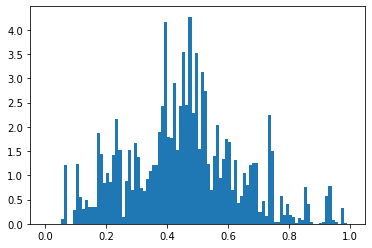

In [49]:
#print(cmass_south.dtype.names)
fig, ax = plt.subplots()
#photoz_val = fracHp[des_val['COADD_OBJECT_ID']]
#photoz_train = fracHp[des_train['COADD_OBJECT_ID']]
#photoz_val2 = photoz_val[photoz_val != hp.UNSEEN]
#photoz_train2 = photoz_train[photoz_train != hp.UNSEEN]

#print(photoz_val2)
nz_val = ax.hist( photoz_val[photoz_val!=hp.UNSEEN], bins=np.linspace(0, 1.0, 101), density=True, weights = dmass_chron_val["CMASS_PROB"][photoz_val!=hp.UNSEEN], label = "des photoz validation")
nz_train = ax.hist( photoz_train[photoz_train!=hp.UNSEEN], bins=np.linspace(0, 1.0, 101), density=True, weights = prob_st82["CMASS_PROB"][photoz_train!=hp.UNSEEN], label = "des photoz train")
nz_spt = ax.hist( photoz_spt[photoz_spt!=hp.UNSEEN], bins=np.linspace(0, 1.0, 101), density=True, weights = dmass_chron_spt["CMASS_PROB"][photoz_val!=hp.UNSEEN], label = "des photoz spt")
#nz_train = ax.hist( photoz_train, bins=np.linspace(0, 1.0, 101), density=True, label = "des photoz training")

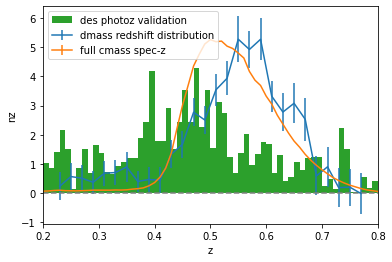

In [50]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.errorbar( z, dmass_norm, yerr=norm_error, label = "dmass redshift distribution")
ax.errorbar( z2, cmass_nz, yerr=0, label = "full cmass spec-z")
nz_val = ax.hist( photoz_val[photoz_val!=hp.UNSEEN], bins=np.linspace(0, 1.0, 101), density=True, weights = dmass_chron_val["CMASS_PROB"][photoz_val!=hp.UNSEEN], label = "des photoz validation")
#ax.hist( cmass_train['Z'], bins=np.linspace(0, 1.0, 101), density=True, color = "purple", label = "cmass training")
plt.legend()
plt.xlabel("z")
plt.ylabel("nz")
plt.xlim(0.2, 0.8)
plt.axhline(y=0, color='grey', linestyle='--')

In [ ]:
# need to find normalization to properly dmass nz to compare against cmass nz